# Pymaceuticals Inc.
---

- # Analysis Report

## Overview
This analysis was conducted using two CSV files: **Mouse MetaData** and **Study Results**.

- **Mouse MetaData:** Contains details of 250 mice showing Mouse ID, Drug Regimen, Sex, Age_months, Weight (g). 
- **Study Results:** Contains details of 1,894 study results showing Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites. 

Using Pandas to read both csv files and merge them into a complete dataset, the following were performed using Matplotlib and presented using charts/graph.


#### 1. Data Cleaning & Preparation
- Duplicates were identified and removed to ensure accuracy.
- The dataset was filtered to analyze only relevant drug regimens (Capomulin, Ramicane, Infubinol, Ceftamin).


#### 2. Exploratory Data Analysis (EDA)
- **Bar & Pie Charts:** Show the distribution of mouse counts per regimen and the male vs. female ratio.
- **Box Plots:** Compare tumor volume distribution across different treatments and identify potential outliers


#### 3. Tumor Volume Analysis for Capomulin
- **Line Plot:** Tracks tumor volume changes over time for a single mouse to observe treatment effects.
- **Scatter Plot:** Explores the relationship between mouse weight and average tumor volume


#### 4. Correlation & Regression Analysis
- A **positive correlation (r = 0.84)** was found between mouse weight and tumor volume, suggesting that larger mice tend to have bigger tumors.
- A **linear regression model** was applied to visualize this relationship, reinforcing the correlation

---

### Conclusion   
- Capomulin and Ramicane were the most effective treatments, showing smaller tumor volumes than other regimens.
- Tumor volume increases with mouse weight, which could influence treatment dosages in future research.
- Outliers in some regimens suggest varied responses to treatments, indicating the need for further study.
 

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [3]:
# Checking the number of mice.
mice_count = data_complete ["Mouse ID"].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = data_complete[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = data_complete[data_complete['Mouse ID'].isin(duplicate)]
duplicate_data = pd.DataFrame(duplicate_data)
duplicate_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_complete = data_complete.drop(data_complete[data_complete['Mouse ID'].isin(duplicate)].index)
clean_data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_data_complete ["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = summary_stats.mean()
median = summary_stats.median()
var = summary_stats.var()
std = summary_stats.std()
sem = summary_stats.apply(st.sem)
summary = pd.DataFrame({'Mean Tumor Volume': mean,'Median Tumor Volume': median,'Tumor Volume Variance': var,'Tumor Volume Std. Dev.': std,'Tumor Volume Std. Err.': sem})
summary 

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_st = clean_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
summary_st = pd.DataFrame(summary_st)
summary_st

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

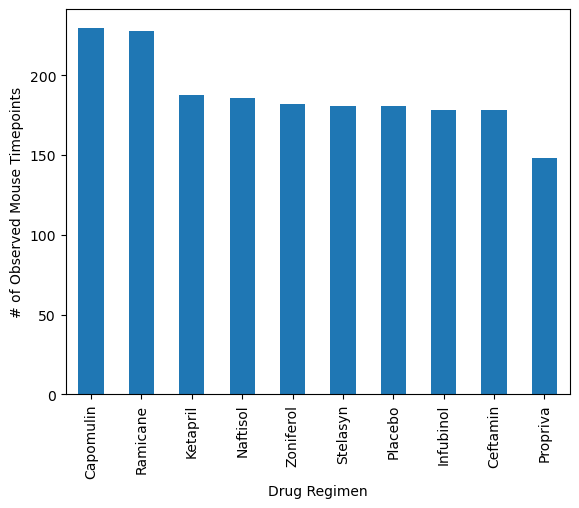

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts = clean_data_complete['Drug Regimen'].value_counts()
# Create a bar plot using Pandas
row_counts.plot(kind='bar', figsize=(6.5, 5), color= '#1F77B4')

# Customize the plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)  

# Display the plot
plt.show()

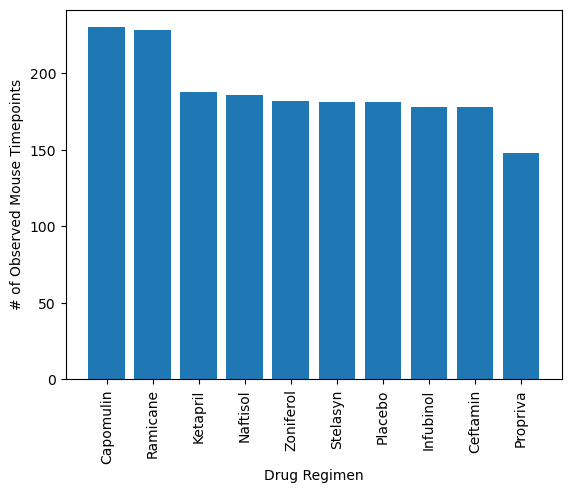

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(row_counts.index, row_counts.values, color= '#1F77B4')

# Customize the plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)  

# Display the plot
plt.show()

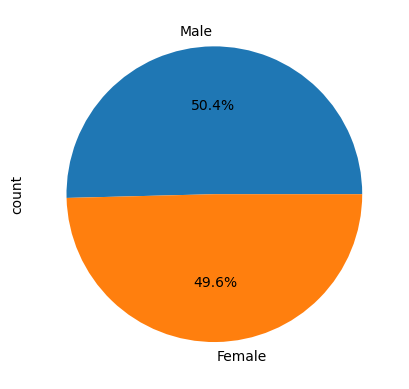

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_data_complete[['Mouse ID','Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', color= ['#1F77B4', 'orange'])
plt.show()

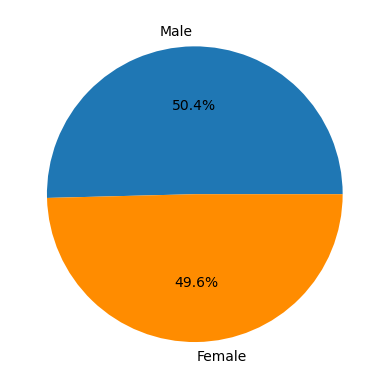

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_data_complete[['Mouse ID','Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
# Create a pie chart using Matplotlib Pyplot 
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors= ['#1F77B4', 'darkorange'])

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data_complete.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_clean_complete_data = pd.merge(last_timepoints, clean_data_complete, on=["Mouse ID", "Timepoint"], how="left")

# Filter only for the four drug treatment regimens
final_tumor_volume = merged_clean_complete_data[merged_clean_complete_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_volume

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
3       a275         45           62.999356                 3     Ceftamin   
6       a411         45           38.407618                 1     Ramicane   
7       a444         45           43.047543                 0     Ramicane   
..       ...        ...                 ...               ...          ...   
238     y769         45           68.594745                 4     Ceftamin   
239     y793         45           31.896238                 2    Capomulin   
240     y865         45           64.729837                 3     Ceftamin   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
3    Female          20          28  
6      Male           3          22  
7    Female          10          25  
..      ...         ...         ...  
238  Female           6          27  
239    Male          17          17  
240    Male          23          26  
244    Male          11          16  
245  Female          24          25  

[100 rows x 8 columns]

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments: 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_clean_complete_data[merged_clean_complete_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    # Add subset to tumor_vol_list (for later plotting)
    tumor_vol_data.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([.25, .5, .75])  # Ensure consistent indentation
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print (f"{drug}'s potential outliers", outliers)



Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\44779\AppData\Local\Temp\ipykernel_13556\1135992862.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)


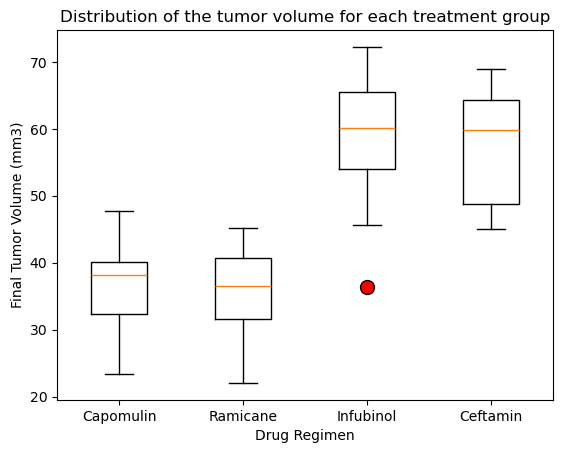

In [130]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='red', markersize=10) # Define the properties for the outliers (red circles). Code correction asssitance with Chat GPT.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

plt.title('Distribution of the tumor volume for each treatment group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
# Display the plot
plt.show()

## Line and Scatter Plots

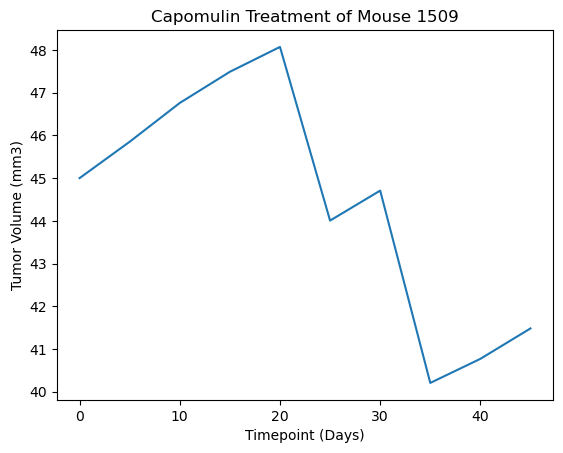

In [176]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plot_capomulin = clean_data_complete[(clean_data_complete["Mouse ID"] == "l509") & (clean_data_complete["Drug Regimen"] == "Capomulin")]
# Plot tumor volume vs. time point
plt.plot(plot_capomulin["Timepoint"], plot_capomulin["Tumor Volume (mm3)"], color='#1F77B4')

# Add labels and title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")
plt.show()

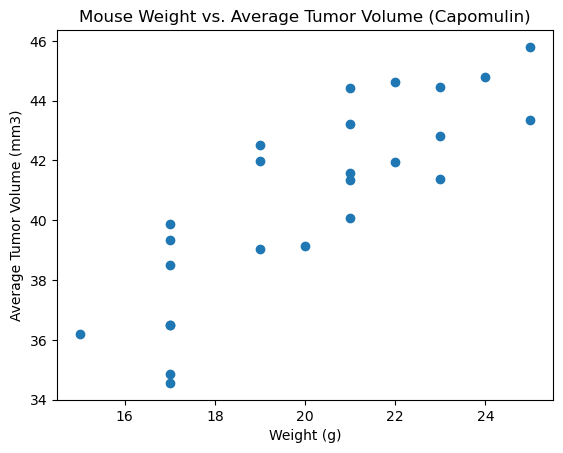

In [178]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data_complete[clean_data_complete["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.scatter(mouse_weights, avg_tumor_vol, color="#1F77B4")

# Labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")

plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


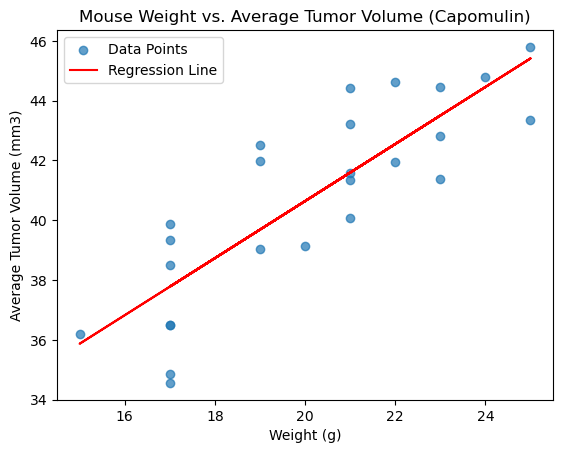

In [186]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
capomulin_data = clean_data_complete[clean_data_complete["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get each mouse's weight
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate correlation coefficient
correlation = avg_tumor_vol.corr(mouse_weights)
print(f"Correlation coefficient: {correlation:.2f}")

# Perform linear regression #code correction assisted with Chat GPT
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_vol)

# Generate regression line
regression_line = slope * mouse_weights + intercept

# Plot scatter plot
plt.scatter(mouse_weights, avg_tumor_vol, color="#1F77B4", alpha=0.7, label="Data Points")

# Plot regression line
plt.plot(mouse_weights, regression_line, color="red", label="Regression Line")

# Labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.legend()

# Show plot
plt.show()